In [1]:
import pandas as pd

def load_data(path):
    return pd.read_csv(path)

In [3]:
fire_data = load_data('C://Projects//Forest-Fires//Portugal//data//forestfires.csv')
fire_data.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fire_data, test_size=0.2, random_state=42)
work_set = train_set.copy()

<Axes: xlabel='X', ylabel='Y'>

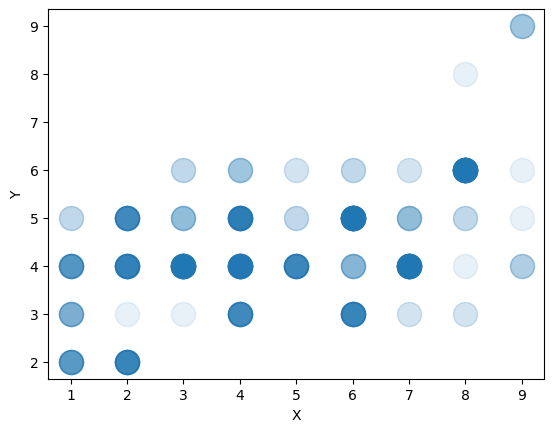

In [8]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.1, s=300)

<Axes: xlabel='X', ylabel='Y'>

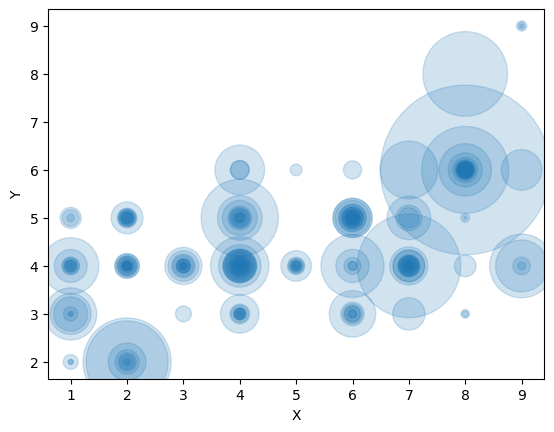

In [9]:
work_set.plot(kind='scatter', x='X', y='Y', alpha=0.2, s=20*work_set['area'])

In [10]:
corr_matrix = work_set.corr()
corr_matrix['area'].sort_values(ascending=False)

ValueError: could not convert string to float: 'sep'

array([[<Axes: xlabel='area', ylabel='area'>,
        <Axes: xlabel='DMC', ylabel='area'>,
        <Axes: xlabel='temp', ylabel='area'>,
        <Axes: xlabel='RH', ylabel='area'>],
       [<Axes: xlabel='area', ylabel='DMC'>,
        <Axes: xlabel='DMC', ylabel='DMC'>,
        <Axes: xlabel='temp', ylabel='DMC'>,
        <Axes: xlabel='RH', ylabel='DMC'>],
       [<Axes: xlabel='area', ylabel='temp'>,
        <Axes: xlabel='DMC', ylabel='temp'>,
        <Axes: xlabel='temp', ylabel='temp'>,
        <Axes: xlabel='RH', ylabel='temp'>],
       [<Axes: xlabel='area', ylabel='RH'>,
        <Axes: xlabel='DMC', ylabel='RH'>,
        <Axes: xlabel='temp', ylabel='RH'>,
        <Axes: xlabel='RH', ylabel='RH'>]], dtype=object)

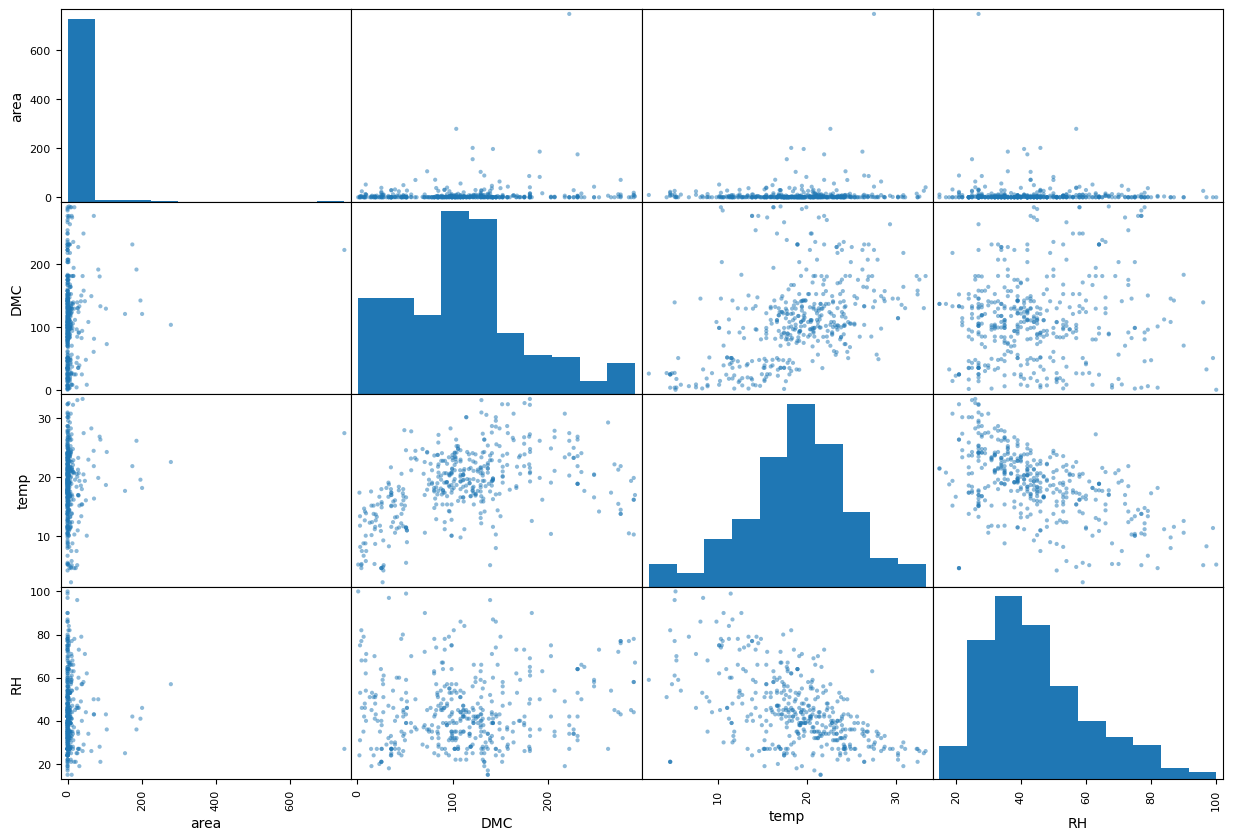

In [11]:
from pandas.plotting import scatter_matrix

attributes = ['area', 'DMC', 'temp', 'RH']
scatter_matrix(work_set[attributes], figsize=(15,10))

In [11]:
fires = work_set.drop('area', axis=1)
fires_labels = work_set['area'].copy()

In [12]:
fires['month'].unique()

array(['sep', 'aug', 'feb', 'mar', 'oct', 'apr', 'dec', 'jul', 'jun',
       'jan', 'may', 'nov'], dtype=object)

In [13]:
fires['day'].unique()

array(['sat', 'mon', 'tue', 'sun', 'fri', 'thu', 'wed'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelBinarizer

month_encoder = LabelBinarizer()
day_encoder = LabelBinarizer()

months = fires['month']
days = fires['day']

month_1hot = month_encoder.fit_transform(months)
day_1hot = day_encoder.fit_transform(days)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = fires.drop(['month', 'day'], axis=1)
scaled_features = scaler.fit_transform(numerical_features)

In [16]:
scaled_features

array([[ -2.88472000e-01,  -1.09485913e+00,   2.80285578e-01, ...,
         -1.05941934e+00,   1.63124094e-03,  -6.78170911e-02],
       [ -2.88472000e-01,  -2.66696454e-01,   6.16522396e-02, ...,
         -3.35214892e-01,  -1.00892252e+00,  -6.78170911e-02],
       [ -1.16128472e+00,   5.61466218e-01,   2.63467629e-01, ...,
          1.47588074e-01,   1.63124094e-03,  -6.78170911e-02],
       ..., 
       [ -1.16128472e+00,  -1.92302180e+00,   2.63467629e-01, ...,
          6.90741409e-01,  -5.03645641e-01,  -6.78170911e-02],
       [ -1.16128472e+00,   5.61466218e-01,   4.48342905e-02, ...,
          3.88989556e-01,  -1.23349003e+00,  -6.78170911e-02],
       [ -1.16128472e+00,  -2.66696454e-01,   7.17552255e-01, ...,
         -2.74864521e-01,   1.63124094e-03,  -6.78170911e-02]])

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

class CustomBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, class_labels):
        self.class_labels = class_labels
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return MultiLabelBinarizer(classes=self.class_labels).fit_transform(X)

In [19]:
from sklearn.pipeline import Pipeline
import numpy as np

numerical_attributes = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
categorical_attributes = ['month', 'day']
categorical_classes = np.concatenate((fires['month'].unique(), fires['day'].unique()), axis=0)

numerical_pipeline = Pipeline([
    ('selector', AttributeSelector(numerical_attributes)),
    ('standardize', StandardScaler()),
])
categorical_pipeline = Pipeline([
    ('selector', AttributeSelector(categorical_attributes)),
    ('encode', CustomBinarizer(categorical_classes)),
])

In [20]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list= [
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),
])

In [21]:
fires_prepared = full_pipeline.fit_transform(fires)

In [22]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(fires_prepared, fires_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
some_data = fires.iloc[:5]
some_labels = fires_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
some_predictions = lr_model.predict(some_data_prepared)

In [24]:
print(some_predictions)
print(list(some_labels))

[ 18.95308067  17.52143095   1.8387682   19.12084738   6.85086008]
[3.3300000000000001, 3.0699999999999998, 3.0899999999999999, 14.68, 6.3799999999999999]


In [25]:
from sklearn.metrics import mean_squared_error

fires_predictions = lr_model.predict(fires_prepared)
lr_mse = mean_squared_error(fires_labels, fires_predictions)
lr_rmse = np.sqrt(lr_mse)
print(lr_rmse)

44.4532741046


In [26]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()
dtr_model.fit(fires_prepared, fires_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [27]:
fires_predictions = dtr_model.predict(fires_prepared)
dtr_mse = mean_squared_error(fires_labels, fires_predictions)
dtr_rmse = np.sqrt(dtr_mse)
print(dtr_rmse)

0.624616298684


In [28]:
from sklearn.model_selection import cross_val_score

dtr_scores = cross_val_score(dtr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)

dtr_rmse_scores = np.sqrt(-dtr_scores)

lr_scores = cross_val_score(lr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)

lr_rmse_scores = np.sqrt(-lr_scores)

In [29]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

display_scores(dtr_rmse_scores)
display_scores(lr_rmse_scores)

Scores:  [  23.95758747  128.35868673  167.53237258   25.54517185   39.27463831
   39.40742765   58.25312999  123.27508355   35.76752182   57.82486061]
Mean:  69.9196480568
Standard Deviation:  48.1566655287
Scores:  [  16.79396157   54.45474309   20.60609778   16.93858408   41.23049924
   21.97246638   20.03594328  119.15641167   16.23465441   33.28695881]
Mean:  36.0710320321
Standard Deviation:  30.1690371252


In [30]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()
rfr_model.fit(fires_prepared, fires_labels)
rfr_scores = cross_val_score(rfr_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
rfr_rmse_scores = np.sqrt(-rfr_scores)

display_scores(rfr_rmse_scores)

Scores:  [  21.45356017   77.01568254   46.91378861   25.39130633   32.98184144
   24.54543501   36.31245233  121.69718631   14.81230626   36.23847655]
Mean:  43.7362035563
Standard Deviation:  30.7578425454


In [31]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()
sgd_model.fit(fires_prepared, fires_labels)
sgd_scores = cross_val_score(sgd_model, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)

display_scores(sgd_rmse_scores)

Scores:  [  17.11169059   54.01487711   17.84539555   15.69860169   33.91704044
   20.8216235    19.08176969  118.74728137   12.85492767   31.68906687]
Mean:  34.178227449
Standard Deviation:  30.5158833329


In [32]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()
ransac.fit(fires_prepared, fires_labels)
ransac_scores = cross_val_score(ransac, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
ransac_rmse_scores = np.sqrt(-ransac_scores)

display_scores(ransac_rmse_scores)

Scores:  [  15.98418381   55.5510782    17.42240548   20.93916473   36.44128168
   26.2978951    18.1502146   122.27455195    9.69254503   34.40207045]
Mean:  35.7155391027
Standard Deviation:  31.4720486161


In [33]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(fires_prepared, fires_labels)
svr_scores = cross_val_score(svr, fires_prepared, fires_labels,
                         scoring='neg_mean_squared_error', cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)

display_scores(svr_rmse_scores)

Scores:  [  14.97786686   56.63886477   16.60063884   14.97942427   35.21825281
   21.03908413   17.23376053  121.18246629   10.13282283   33.78649943]
Mean:  34.1789680763
Standard Deviation:  31.8741367649


In [34]:
from sklearn.model_selection import GridSearchCV

grid_parameters = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_rfr_model = RandomForestRegressor()
grid_search = GridSearchCV(grid_rfr_model, grid_parameters, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(fires_prepared, fires_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [35]:
print('Best: ',  np.sqrt(-grid_search.best_score_), grid_search.best_params_)

Best:  48.7326101335 {'max_features': 4, 'n_estimators': 30}


In [36]:
from sklearn.model_selection import RandomizedSearchCV

random_params = {
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'alpha': np.random.uniform(0, 0.001, 5),
    'epsilon': np.random.uniform(0, 0.1, 5),
    'l1_ratio': np.random.uniform(0, 0.1, 5),
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
random_sgd_model = SGDRegressor()
random_sgd_search = RandomizedSearchCV(random_sgd_model, n_iter=100, cv=5, 
                                   param_distributions=random_params,
                                   scoring='neg_mean_squared_error')
random_sgd_search.fit(fires_prepared, fires_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'alpha': array([ 0.00053,  0.00059,  0.00072,  0.00043,  0.00024]), 'epsilon': array([ 0.0917 ,  0.06526,  0.06479,  0.09999,  0.0037 ]), 'l1_ratio': array([ 0.0922 ,  0.05042,  0.05172,  0.01274,  0.08229]), 'learning_rate': ['constant', 'optimal', 'invscaling']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [37]:
print('Best: ', np.sqrt(-random_sgd_search.best_score_), random_sgd_search.best_params_)

Best:  45.7291585966 {'loss': 'squared_loss', 'learning_rate': 'invscaling', 'l1_ratio': 0.092200304233251096, 'epsilon': 0.065261475541954481, 'alpha': 0.00072292635390512378}


In [38]:
random_params = {
    'C': np.random.uniform(0.5, 1.5, 5),
    'epsilon': np.random.uniform(0, 0.2, 5),
    'degree': [2, 3, 4, 5, 6],
}
random_svr_model = SVR()
random_svr_search = RandomizedSearchCV(random_svr_model, n_iter=50, cv=5, 
                                   param_distributions=random_params,
                                   scoring='neg_mean_squared_error')
random_svr_search.fit(fires_prepared, fires_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'C': array([ 1.36527,  0.70287,  1.42878,  0.72024,  1.39772]), 'epsilon': array([ 0.04896,  0.14195,  0.07003,  0.09925,  0.10803]), 'degree': [2, 3, 4, 5, 6]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [39]:
print('Best: ', np.sqrt(-random_svr_search.best_score_), random_svr_search.best_params_)

Best:  46.7054321729 {'epsilon': 0.04895611168890586, 'degree': 4, 'C': 1.4287786519666628}


In [40]:
feature_names = np.concatenate((numerical_attributes, categorical_classes), axis=0)
sgd_importances = zip(sgd_model.coef_, feature_names)

for feature in sorted(sgd_importances, key=lambda t: t[0]):
    print(feature)

(-2.0886725520127292, 'DC')
(-1.9494298190424915, 'RH')
(-1.5763249363522081, 'ISI')
(-0.96719142750147635, 'fri')
(-0.80382476428625715, 'rain')
(-0.50937939921434483, 'jun')
(-0.34539403066390567, 'FFMC')
(-0.24813076593895228, 'mar')
(-0.091003931774500918, 'apr')
(-0.052751494553725777, 'nov')
(-0.030847394527114595, 'sun')
(0.06562929727589098, 'jan')
(0.12262230317879445, 'oct')
(0.33736578852319771, 'may')
(0.51723701093729935, 'tue')
(0.66063998195324669, 'dec')
(0.68764290530044048, 'Y')
(0.82479280704899061, 'wed')
(0.90860681019911049, 'feb')
(1.8801380945673269, 'wind')
(1.9185539900830926, 'aug')
(2.2056745926310595, 'sat')
(2.293246213101316, 'sep')
(2.3679464487735919, 'mon')
(2.6456887341881505, 'jul')
(2.7375111264408187, 'temp')
(3.133475489658923, 'thu')
(4.6218980903865479, 'DMC')
(4.6667159701695322, 'X')


In [41]:
ransac_importances = zip(ransac.estimator_.coef_, feature_names)

for feature in sorted(ransac_importances, key=lambda t: t[0]):
    print(feature)

(-28.441765993208755, 'sep')
(-19.569272393279498, 'aug')
(-4.8663559840418413, 'FFMC')
(-2.875890503838705, 'DMC')
(-2.6906708714683969, 'thu')
(-1.6794325569738286, 'mon')
(-1.4313854850197476, 'sat')
(-1.1040840697798628, 'X')
(-0.45189821540144348, 'tue')
(-0.37055256645016277, 'sun')
(-2.4868995751603503e-14, 'rain')
(-3.5527136788005009e-15, 'dec')
(-2.6645352591003757e-15, 'jul')
(0.0, 'jan')
(0.0, 'may')
(0.0, 'nov')
(1.2434497875801753e-14, 'apr')
(2.1316282072803006e-14, 'oct')
(0.14027125561265663, 'wind')
(0.95284161682239432, 'RH')
(1.2501932729427088, 'temp')
(2.079895977665938, 'Y')
(2.5569153472323265, 'wed')
(3.0517073649433328, 'ISI')
(4.0670243480813166, 'fri')
(13.387100392469574, 'jun')
(16.362753559579311, 'mar')
(18.261184434439365, 'feb')
(18.495234198109305, 'DC')


In [42]:
svr_importances = zip(svr.coef_[0], feature_names)

for feature in sorted(svr_importances, key=lambda t: t[0]):
    print(feature)

(-1.4364201562359198, 'aug')
(-1.254557757145335, 'mar')
(-1.0040381002609982, 'apr')
(-1.0, 'oct')
(-1.0, 'jun')
(-1.0, 'nov')
(-0.54034879070185382, 'jul')
(-0.34652576537500401, 'feb')
(-0.33089551730728228, 'sep')
(-0.258221297627101, 'fri')
(-0.25586286401565572, 'ISI')
(-0.25025202298521765, 'sun')
(-0.12724406388495046, 'thu')
(-0.10764925818224519, 'DC')
(-0.037543726912514508, 'sat')
(0.038329477869001261, 'RH')
(0.044780536541357829, 'temp')
(0.07092282272062686, 'Y')
(0.13461479117618635, 'X')
(0.16524477713730024, 'mon')
(0.17634120710633239, 'FFMC')
(0.2473066810469372, 'wind')
(0.24947747621676086, 'wed')
(0.25853885805572163, 'tue')
(0.46356805332859718, 'rain')
(0.53696537681544609, 'DMC')
(0.9127860870263943, 'jan')
(1.0, 'may')
(6.0, 'dec')


In [43]:
num_fires_prepared = numerical_pipeline.fit_transform(fires)

num_sgd_model = SGDRegressor()
num_sgd_model.fit(num_fires_prepared, fires_labels)
num_sgd_scores = cross_val_score(num_sgd_model, num_fires_prepared, fires_labels,
                                 scoring='neg_mean_squared_error', cv=10)
num_sgd_rmse_scores = np.sqrt(-num_sgd_scores)

display_scores(num_sgd_rmse_scores)

Scores:  [  15.75574473   53.75412362   17.67118108   15.73157561   33.74650518
   20.72915125   18.2133217   118.35937798   13.27703968   31.26426605]
Mean:  33.8502286868
Standard Deviation:  30.4992597748


In [44]:
num_svr_model = SVR(kernel='linear')
num_svr_model.fit(num_fires_prepared, fires_labels)
num_svr_scores = cross_val_score(num_svr_model, num_fires_prepared, fires_labels,
                                 scoring='neg_mean_squared_error', cv=10)
num_svr_rmse_scores = np.sqrt(-num_svr_scores)

display_scores(num_svr_rmse_scores)

Scores:  [  15.11872085   56.69568373   16.56367664   15.18100974   35.30678089
   21.07577779   17.24739507  121.07724146   10.19703672   33.77128572]
Mean:  34.2234608608
Standard Deviation:  31.8241252833


In [46]:
num_ransac_model = RANSACRegressor()
num_ransac_model.fit(num_fires_prepared, fires_labels)
num_ransac_scores = cross_val_score(num_ransac_model, num_fires_prepared, fires_labels,
                                    scoring='neg_mean_squared_error', cv=10)
num_ransac_rmse_scores = np.sqrt(-num_ransac_scores)

display_scores(num_ransac_rmse_scores)

Scores:  [  15.5321408    57.45494362   16.62113191   15.35877051   36.10408992
   20.86018331   17.38005094  120.99363109    9.64172316   33.88264983]
Mean:  34.3829315095
Standard Deviation:  31.8650063356


In [47]:
grid_parameters = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

num_grid_rfr_model = RandomForestRegressor()
num_grid_search = GridSearchCV(num_grid_rfr_model, grid_parameters, cv=5,
                           scoring='neg_mean_squared_error')
num_grid_search.fit(num_fires_prepared, fires_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [48]:
print('Best: ',  np.sqrt(-num_grid_search.best_score_), num_grid_search.best_params_)

Best:  48.8654282239 {'max_features': 2, 'n_estimators': 30}


In [49]:
num_svr_importances = zip(num_svr_model.coef_[0], numerical_attributes)

for feature in sorted(num_svr_importances, key=lambda t: t[0]):
    print(feature)

(-0.30944063681065703, 'ISI')
(-0.16232400766246363, 'temp')
(-0.032838040008784986, 'RH')
(0.16365567654261559, 'FFMC')
(0.17231880623072504, 'X')
(0.17484465708996028, 'Y')
(0.25343579649023162, 'DC')
(0.28921254488584325, 'wind')
(0.3018169748721965, 'DMC')
(0.47485482271995266, 'rain')


In [50]:
num_ransac_importances = zip(num_ransac_model.estimator_.coef_, numerical_attributes)

for feature in sorted(num_ransac_importances, key=lambda t: t[0]):
  print(feature)

(-0.27360272404721014, 'X')
(-0.22469229450353576, 'DMC')
(-0.1197869367245038, 'DC')
(1.7881816130455771e-32, 'rain')
(0.16609690467463892, 'FFMC')
(0.21392538605002617, 'wind')
(0.33580370138337851, 'ISI')
(0.41664470799047176, 'Y')
(0.57568220279604287, 'RH')
(0.76053996859735196, 'temp')


In [51]:
num_sgd_importances = zip(num_sgd_model.coef_, numerical_attributes)

for feature in sorted(num_sgd_importances, key=lambda t: t[0]):
    print(feature)

(-2.2121761633463217, 'RH')
(-1.5730267572210583, 'DC')
(-1.5179536399750813, 'ISI')
(-0.62853744972206671, 'rain')
(-0.343720695789898, 'FFMC')
(0.120143352500966, 'Y')
(1.6123916345970442, 'wind')
(2.3556922005851693, 'temp')
(3.8371553642063514, 'X')
(5.2815061049116521, 'DMC')


In [54]:
from sklearn.externals import joblib

joblib.dump(sgd_model, '../models/sgd_model.pkl')
joblib.dump(svr, '../models/svr_model.pkl')
joblib.dump(ransac, '../models/ransac_model.pkl')
joblib.dump(rfr_model, '../models/rfr_model.pkl')
joblib.dump(lr_model, '../models/lr_model.pkl')
joblib.dump(full_pipeline, '../models/pipeline.pkl')

['../models/pipeline.pkl']

In [55]:
final_model = joblib.load('../models/sgd_model.pkl')

X_test = test_set.drop('area', axis=1)
y_test = test_set['area'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
print(final_rmse)